In [1]:
import sys
 
# setting path
sys.path.append('../')
import csv

from utils.dataloaders import MIDIEvalDataLoader
from utils.display import display_dicom
from dcm_anonymizers.utils import list_all_files

from pathlib import Path

In [2]:
root_data_dir = '/home/r079a/Desktop/de-identification/dataset'

loader = MIDIEvalDataLoader(
    rawimagespath=Path(root_data_dir, 'images/manifest-1617826555824'),
    deidimagespath=Path(root_data_dir, 'images-2/manifest-1617826161202'),
    uidsmappath=Path(root_data_dir, 'Pseudo-PHI-DICOM-Dataset-uid_crosswalk.csv'),
)

In [46]:
(rawdcm, metadata), (deiddcm, deiddcm_metadata) = loader.get_raw_n_deid_patient(6, include_metadata=True)

In [47]:
deiddcm_metadata

{'Series UID': '1.3.6.1.4.1.14519.5.2.1.8700.9668.283183069665765319358456872530',
 'Collection': 'Pseudo-PHI-DICOM-Data',
 '3rd Party Analysis': 'NO',
 'Data Description URI': 'https://doi.org/10.7937/s17zr072',
 'Subject ID': 'Pseudo-PHI-007',
 'Study UID': '1.3.6.1.4.1.14519.5.2.1.8700.9668.247858857617292807468978545970',
 'Study Description': 'ABDOMENPELVIS',
 'Study Date': '05-23-1978',
 'Series Description': 'PJN',
 'Manufacturer': 'GE MEDICAL SYSTEMS',
 'Modality': 'MR',
 'SOP Class Name': 'MR Image Storage',
 'SOP Class UID': '1.2.840.10008.5.1.4.1.1.4',
 'Number of Images': 19,
 'File Size': '10.05 MB',
 'File Location': './Pseudo-PHI-DICOM-Data/Pseudo-PHI-007/05-23-1978-NA-ABDOMENPELVIS-45970/237.000000-PJN-72530',
 'Download Timestamp': '2024-06-03T18:25:36.887'}

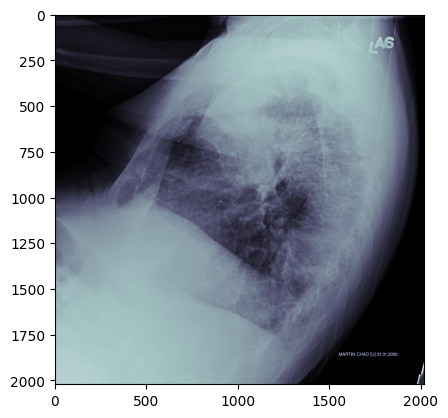

In [5]:
display_dicom(rawdcm[0])

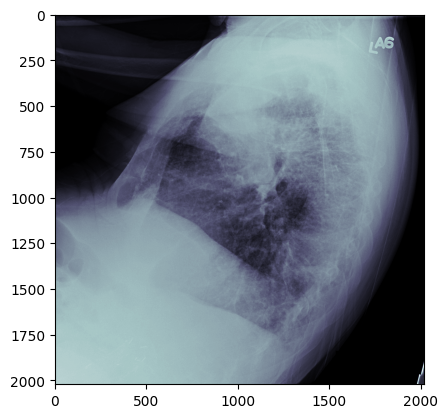

In [6]:
display_dicom(deiddcm[0])

In [7]:
# for element in rawdcm[0]:
#     if element.VR == 'OW' or element.VR == 'UI':
#         continue
        
#     thisval = element.value
#     deidval = ''
#     if element.tag in deiddcm[0]:
#         deidval = deiddcm[0][element.tag].value

#     if deidval != thisval:
#         print(element.tag, element.name, element.VR)
#         print(f"{thisval} --> {deidval}")

In [11]:
from dicomanonymizer.anonymizer import anonymize
from pathlib import Path
import os

In [9]:
rootdir = '/home/r079a/Desktop/de-identification/'

raw_img_path = Path(rootdir, 'dataset/images/manifest-1617826555824', metadata['File Location'])
output_path = Path(rootdir, 'dicom-output')

In [10]:
first_dcm_name = os.listdir(raw_img_path)[0]
first_dcm_name

'1-1.dcm'

In [11]:
anonymize(
    Path(raw_img_path, first_dcm_name), output_path, {}, True,
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.39it/s]


In [12]:
from pydicom import dcmread
import pandas as pd

In [13]:
with open(Path(output_path, first_dcm_name), 'rb') as infile:
    ds = dcmread(infile)

In [14]:
tagvalues = []
for element in rawdcm[0]:
    if element.VR == 'OW':
        continue
    deidval = "Not available"
    if element.tag in deiddcm[0]:
        deidval = str(deiddcm[0][element.tag].value)
    dcmannonval = "Not available"
    if element.tag in ds:
        dcmannonval = str(ds[element.tag].value)
    changed = False
    # if str(element.value) != deidval or str(element.value) != dcmannonval:
    if str(element.value) != deidval:
        changed = True
    values_tuple = (str(element.tag), element.name, str(element.value), deidval, dcmannonval, changed)
    tagvalues.append(values_tuple)

In [15]:
valus_df = pd.DataFrame(tagvalues, columns =['Tag', 'Name', 'Raw Metadata', 'Ground Truth Anonimization', 'Dicom Anonymizer', 'Changed'])

In [16]:
pd.set_option('display.max_rows', 82)
valus_df[valus_df['Changed']]

,Tag,Name,Raw Metadata,Ground Truth Anonimization,Dicom Anonymizer,Changed
3,"(0008, 0018)",SOP Instance UID,2.25.463628102274132074849128424375172598,1.3.6.1.4.1.14519.5.2.1.8700.9668.509369161722...,2.25.77247770200836280138190517145963847057,True
4,"(0008, 0020)",Study Date,20010705,19910618,00010101,True
5,"(0008, 0021)",Series Date,20010705,19910618,00010101,True
6,"(0008, 0022)",Acquisition Date,20010705,19910618,00010101,True
7,"(0008, 0023)",Content Date,20010705,19910618,00010101,True
8,"(0008, 0024)",Overlay Date,20010705,19910618,00010101,True
9,"(0008, 0025)",Curve Date,20010705,19910618,00010101,True
10,"(0008, 002a)",Acquisition DateTime,20010705,19910618,00010101010101.000000+0000,True
14,"(0008, 0050)",Accession Number,20010706E403961,,,True
17,"(0008, 0080)",Institution Name,Mccoy Medical Clinic,Not available,ANONYMIZED,True


In [17]:
# targettag = (0x0018,0xa001)
# print(rawdcm[0][targettag].value)
# print(deiddcm[0][targettag].value)
# print(ds[targettag].value)

### Evaluate PS_3_3 Anonymizer

In [119]:
(rawdcm, metadata), (deiddcm, deiddcm_metadata) = loader.get_raw_n_deid_patient(14, include_metadata=True)

raw_dcm = rawdcm[0]
deid_dcm = deiddcm[0]

In [120]:
metadata

{'Series UID': '2.25.138715083337522222202549203339113512438',
 'Collection': 'Pseudo-PHI-DICOM-Data',
 '3rd Party Analysis': 'NO',
 'Data Description URI': 'https://doi.org/10.7937/s17zr072',
 'Subject ID': 8155012288,
 'Study UID': '2.25.27157770470249991394859340106290544118',
 'Study Description': 'FORFILE CT CHABPEL - CD for 8155012288',
 'Study Date': '09-08-1999',
 'Series Description': 'SCOUT',
 'Manufacturer': 'GE MEDICAL SYSTEMS',
 'Modality': 'CT',
 'SOP Class Name': 'CT Image Storage',
 'SOP Class UID': '1.2.840.10008.5.1.4.1.1.2',
 'Number of Images': 2,
 'File Size': '4.39 MB',
 'File Location': './Pseudo-PHI-DICOM-Data/8155012288/09-08-1999-NA-FORFILE CT CHABPEL - CD for 8155012288-44118/1.000000-SCOUT-12438',
 'Download Timestamp': '2024-06-03T18:21:49.137'}

In [121]:
deiddcm_metadata

{'Series UID': '1.3.6.1.4.1.14519.5.2.1.8700.9668.153468882187660986881241722199',
 'Collection': 'Pseudo-PHI-DICOM-Data',
 '3rd Party Analysis': 'NO',
 'Data Description URI': 'https://doi.org/10.7937/s17zr072',
 'Subject ID': 'Pseudo-PHI-014',
 'Study UID': '1.3.6.1.4.1.14519.5.2.1.8700.9668.747640813546474991688004814833',
 'Study Description': 'CT CHABPEL',
 'Study Date': '08-21-1989',
 'Series Description': 'SCOUT',
 'Manufacturer': 'GE MEDICAL SYSTEMS',
 'Modality': 'CT',
 'SOP Class Name': 'CT Image Storage',
 'SOP Class UID': '1.2.840.10008.5.1.4.1.1.2',
 'Number of Images': 2,
 'File Size': '4.39 MB',
 'File Location': './Pseudo-PHI-DICOM-Data/Pseudo-PHI-014/08-21-1989-NA-CT CHABPEL-14833/1.000000-SCOUT-22199',
 'Download Timestamp': '2024-06-03T18:26:07.527'}

In [122]:
anonymizer_output_path = Path(root_data_dir, 'anonymizer-output/Pseudo-PHI-DICOM-Data-7-soft-detection')

In [123]:
path_mapping_file = Path(anonymizer_output_path, 'mappings/path_mapping.csv')

def id_map_csv_to_dict(csvfile: str):
    id_map = {}
    with open(path_mapping_file, mode ='r')as file:
      mapping = csv.reader(file)
      for idx, lines in enumerate(mapping):
          if idx == 0:
              continue
          id_map[lines[0]] = lines[1]
    return id_map 

series_output_map = id_map_csv_to_dict(path_mapping_file)

def get_first_dcm_path_from_series(seriesUID: str):
    series_path = series_output_map.get(seriesUID, '')
    if series_path == "":
        print(f"No path found for given series id {seriesUID}")
        return
    full_series_path = anonymizer_output_path / 'data' / series_path
    alldcms = list_all_files(full_series_path)
    print(full_series_path)
    if len(alldcms) == 0:
        print(f"No dicom found for given series id {seriesUID}")
        return
    return alldcms[0]

In [124]:
deidentfied_dcm_path = get_first_dcm_path_from_series(metadata['Series UID'])
print(deidentfied_dcm_path)
with open(deidentfied_dcm_path, 'rb') as infile:
    deidentfied_dcm = dcmread(infile)

/home/r079a/Desktop/de-identification/dataset/anonymizer-output/Pseudo-PHI-DICOM-Data-7-soft-detection/data/Pseudo-PHI-014/1.2.826.0.1.3680043.8.498.12040125037674462588549715638810629814/1.2.826.0.1.3680043.8.498.67693845197980574211045849288741847475
/home/r079a/Desktop/de-identification/dataset/anonymizer-output/Pseudo-PHI-DICOM-Data-7-soft-detection/data/Pseudo-PHI-014/1.2.826.0.1.3680043.8.498.12040125037674462588549715638810629814/1.2.826.0.1.3680043.8.498.67693845197980574211045849288741847475/1-1.dcm


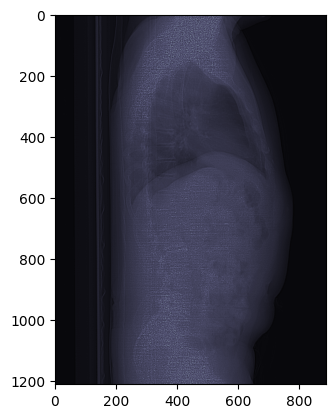

In [125]:
display_dicom(raw_dcm)

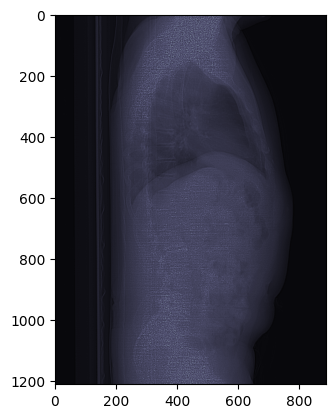

In [126]:
display_dicom(deid_dcm)

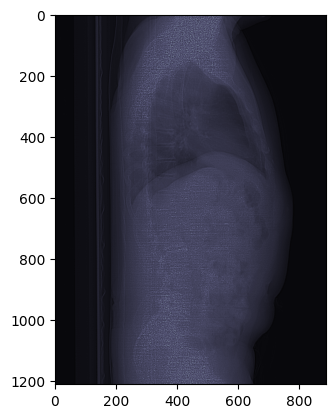

In [127]:
display_dicom(deidentfied_dcm)

In [128]:
# tagvalues = []
# for element in raw_dcm:
#     if element.VR == 'OW':
#         print(element.name)
#         continue
#     deidval = "Not available"
#     if element.tag in deid_dcm:
#         deidval = str(deid_dcm[element.tag].value)
#     dcmannonval = "Not available"
#     if element.tag in deidentfied_dcm:
#         dcmannonval = str(deidentfied_dcm[element.tag].value)
#     changed = False
#     if str(element.value) != deidval:
#         changed = True
#     values_tuple = (str(element.tag), element.name, str(element.value), deidval, dcmannonval, changed)
#     tagvalues.append(values_tuple)

In [129]:
import pydicom

In [130]:
tagvalues = []
    
def extract_tags(dcm, gt_ds, annon_ds):
    elements = dcm
    gt_elements = gt_ds
    annon_elements = annon_ds
    parent_tag = None
    
    if isinstance(dcm, pydicom.dataelem.DataElement):
        parent_tag = dcm.tag
        if len(dcm.value) == 0:
            return
        
        elements = dcm.value[0]
        gt_elements = None
        if gt_ds and len(gt_ds.value) > 0:
            gt_elements = gt_ds.value[0]
        
        annon_elements = None
        if annon_ds and len(annon_ds.value) > 0:
            annon_elements = annon_ds.value[0] if annon_ds else None
        
    for element in elements:
        deidelem = gt_elements.get(element.tag) if gt_elements else None
        dcmannonelem = annon_elements.get(element.tag) if annon_elements else None
        
        if element.VR == 'OW':
            continue
        elif element.VR == 'SQ':
            extract_tags(element, deidelem, dcmannonelem)
            continue
        # targettags.append(element.tag)
        
        deidval = "Not available"
        if deidelem:
            deidval = str(deidelem.value)
        dcmannonval = "Not available"
        if dcmannonelem:
            dcmannonval = str(dcmannonelem.value)
        changed = False
        if dcmannonval != deidval:
            changed = True

        element_tag_str = str(element.tag)
        if parent_tag:
            element_tag_str = f"{str(parent_tag)} - {str(element.tag)}"
        values_tuple = (element_tag_str, element.VR, element.name, str(element.value), deidval, dcmannonval, changed)
        tagvalues.append(values_tuple)

extract_tags(raw_dcm, deid_dcm, deidentfied_dcm)

In [131]:
valus_df = pd.DataFrame(tagvalues, columns =['Tag', 'VR', 'Name', 'Raw Metadata', 'Ground Truth Anonimization', 'PS 3.3 Anonymizer', 'Changed'])

In [132]:
changed_df = valus_df[valus_df['Changed']]
changed_df

,Tag,VR,Name,Raw Metadata,Ground Truth Anonimization,PS 3.3 Anonymizer,Changed
2,"(0008, 0012)",DA,Instance Creation Date,19990908,19890821,20000106,True
5,"(0008, 0018)",UI,SOP Instance UID,2.25.24988633710936769796383448125889166838,1.3.6.1.4.1.14519.5.2.1.8700.9668.155579066617...,1.2.826.0.1.3680043.8.498.35687419329922679971...,True
6,"(0008, 0020)",DA,Study Date,19990908,19890821,20000106,True
7,"(0008, 0021)",DA,Series Date,19990908,19890821,20000106,True
8,"(0008, 0022)",DA,Acquisition Date,19990908,19890821,20000106,True
9,"(0008, 0023)",DA,Content Date,19990908,19890821,20000106,True
20,"(0008, 1030)",LO,Study Description,FORFILE CT CH/AB/PEL - CD for 8155012288,CT CH/AB/PEL,FORFILE CT CH/AB/PEL - CD,True
24,"(0008, 1032) - (0008, 0104)",LO,Code Meaning,FORFILE CT CH/AB/PEL - CD,CT CH/AB/PEL - CD,FORFILE CT CH/AB/PEL - CD,True
28,"(0008, 1110) - (0008, 1150)",UI,Referenced SOP Class UID,1.2.840.10008.3.1.2.3.1,1.2.840.10008.3.1.2.3.1,2.25.240563487126144085379130555043095447488,True
29,"(0008, 1110) - (0008, 1155)",UI,Referenced SOP Instance UID,2.25.229191488338228457459107098356497366518,1.3.6.1.4.1.14519.5.2.1.8700.9668.124053916736...,2.25.20871325747581555738765933725720944501,True


In [133]:
n_mismatched = 0
mismatched_tags = []

for index, row in valus_df.iterrows():
    gt_val = row['Ground Truth Anonimization']
    target_val = row['PS 3.3 Anonymizer']

    if gt_val != target_val:
        if row['VR'] == 'UI' and not (gt_val == "" or target_val == ""):
            continue
        elif row['VR'] in ('DA', 'DT', 'TM') and not (gt_val == "" or target_val == ""):
            if len(gt_val) != len(target_val):
                pass
            continue
        elif row['Tag'] in ('(0010, 0010)', '(0010, 0020)'):
            continue
        n_mismatched += 1
        mismatched_tags.append(row['Name'])

print(n_mismatched)
print(mismatched_tags)

2
['Study Description', 'Code Meaning']
